In [1]:
from qiskit.quantum_info import *
from qiskit import *
import numpy as np
import sympy as sp
import math
from qiskit.quantum_info import concurrence, state_fidelity
from sympy import *

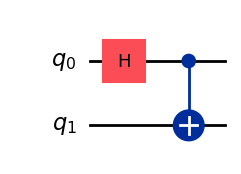

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

In [3]:
rho_0 = np.real(DensityMatrix(qc).data)
rho_0

array([[0.5, 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0.5]])

In [4]:
state_0 = np.real(Statevector(qc).data)
state_0

array([0.70710678, 0.        , 0.        , 0.70710678])

/var/folders/s5/3vrfy9z53w54xh40slw5vx980000gn/T/ipykernel_37375/634808780.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp((b) / (temp_value)) - 1)


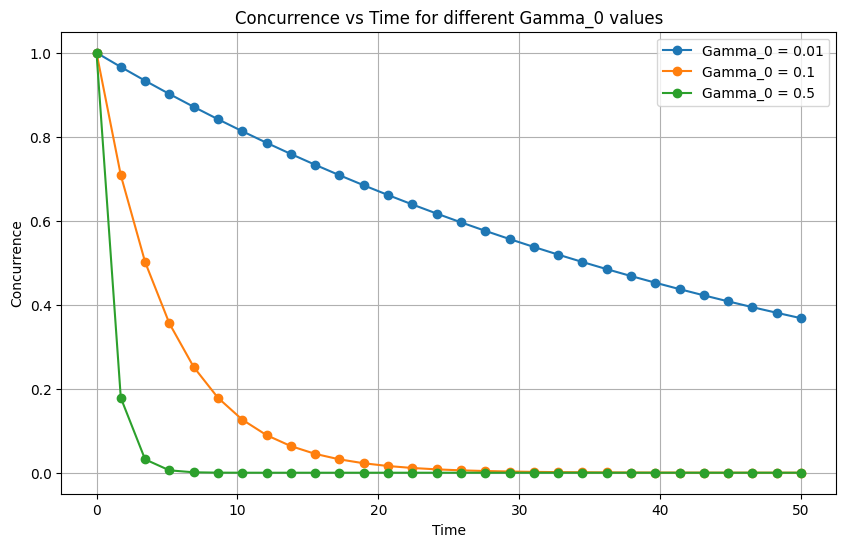

[0.9999999999999994,
 0.1783267154561532,
 0.03180041744537995,
 0.005670863993169156,
 0.001011266549700414,
 0.00018033584225874907,
 3.21586984290247e-05,
 5.734755064193756e-06,
 1.0226600345426915e-06,
 1.8236760498816298e-07,
 3.2521016003197664e-08,
 5.799365967133893e-09,
 1.0341818846470096e-09,
 1.8442225867035494e-10,
 3.2887415645391584e-11,
 5.8647048132465945e-12,
 1.0458335463618717e-12,
 1.865000609746855e-13,
 3.32579433573655e-14,
 5.9307797878661815e-15,
 1.0576164817189317e-15,
 1.8860127255176122e-16,
 3.363264754570387e-17,
 5.997598762768835e-18,
 1.0695319175267233e-18,
 1.907260323660721e-19,
 3.401141789089012e-20,
 6.065198443968506e-21,
 1.0815968120499038e-21,
 1.9287202321837021e-22]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
b = 1   # Angular momentum (omega), constant value
temp_value = 0.00001 # Temperature value
gamma_0_values = [0.01, 0.1, 0.5]  # Gamma_0 values
time_values = np.linspace(0, 50, 30)  # Time values for plotting from 0 to 100 with step 1
#print(len(time_values))
# Functions
def calculate_N(temp_value):
    return 1 / (np.exp((b) / (temp_value)) - 1)

def calculate_lambda(gamma_0, t):
    result = 1 - np.exp(-gamma_0 * t)
    #print(f"Gamma_0: {gamma_0}, t: {t}, Result: {result}")
    return result


def calculate_gamma(gamma_0, N, t):
    return 1 - np.exp(-gamma_0 * (2 * N + 1) * t)

def calculate_P(N):
    return (N + 1) / (2 * N + 1)

# Calculate N for the single temperature value
N = calculate_N(temp_value)
p = 1

# Plotting
plt.figure(figsize=(10, 6))


# Iterate over gamma_0 values
for gamma_0 in gamma_0_values:
    # Calculate lambda and gamma for the single time value
    lambda_values = calculate_lambda(gamma_0, time_values)
    gamma_values = calculate_gamma(gamma_0, N, time_values)
    #print(f"Lambda Values: {lambda_values}")
    #print(f"Gamma Values: {gamma_values}")
    concurrence_values = []

    # Initialize list to store concurrence values for each time step

    # Iterate over time values
    for t, lambda_val, gamma_val in zip(time_values, lambda_values, gamma_values):
        #print(f"Time: {t}, Lambda: {lambda_val}, Gamma: {gamma_val}")
        # Assuming rho_0 is defined somewhere

        # Define Kraus operators for the first type
        K0 = np.array([[1, 0], [0, np.sqrt(1 - lambda_val)]])
        K1 = np.array([[0, np.sqrt(lambda_val)], [0, 0]])
        K = [K0, K1]  # List of Kraus operators K_i
    
        # Define Kraus operators for the second type
        E0 = np.array([[1, 0], [0, np.sqrt(1 - lambda_val)]])
        E1 = np.array([[0, np.sqrt(lambda_val)], [0, 0]])
        E = [E0, E1]  # List of Kraus operators E_j

        # Initialize the result matrix rho(t) as a zero matrix of appropriate size
        rho_t = np.zeros_like(rho_0)

        # Iterate over all combinations of K and E
        for K_i in K:
            for E_j in E:
                # Calculate the Kronecker product of K_i and E_j
                kron_product = np.kron(K_i, E_j)

                # Calculate the conjugate transpose (Hermitian) of K_i and E_j
                kron_conj_transpose = np.conj(kron_product).T #np.kron(np.conj(K_i.T), np.conj(E_j.T))

                # Apply the formula: kron_product * rho_0 * kron_conj_transpose
                rho_t += np.dot(kron_product, np.dot(rho_0, kron_conj_transpose))

        # Calculate concurrence for rho_t at current time step
        con_t = concurrence(rho_t)
        concurrence_values.append(con_t)

    # Plot concurrence values for current gamma_0
    plt.plot(time_values, concurrence_values, label=f'Gamma_0 = {gamma_0}', marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Concurrence')
plt.title('Concurrence vs Time for different Gamma_0 values')
plt.legend()
plt.grid(True)
plt.show()
concurrence_values



/var/folders/s5/3vrfy9z53w54xh40slw5vx980000gn/T/ipykernel_37375/2675272666.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp((b) / (temp_value)) - 1)


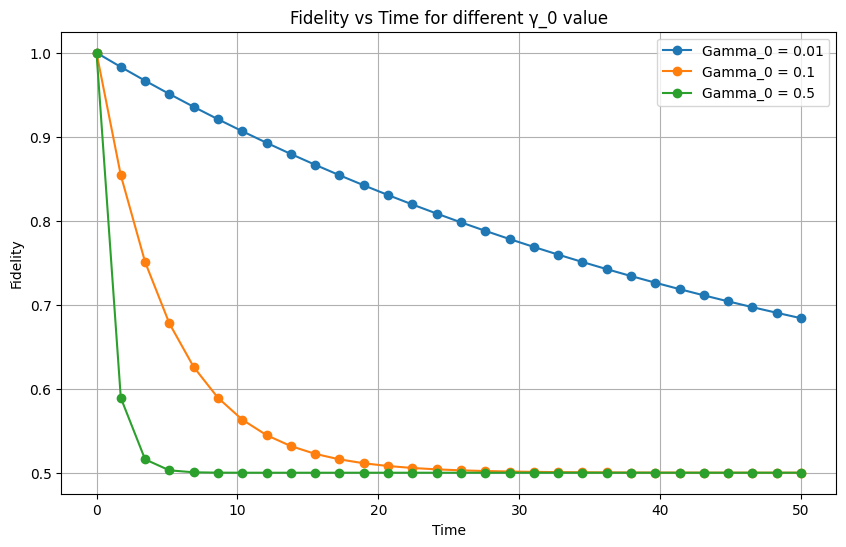

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
b = 1   # Angular momentum (omega), constant value
temp_value = 0.0001 # Temperature valu
gamma_0_values = [0.01, 0.1, 0.5]
time_values = np.linspace(0, 50, 30)  # Time values for plotting from 0 to 100 with step 1
#print(len(time_values))
# Functions
def calculate_N(temp_value):
    return 1 / (np.exp((b) / (temp_value)) - 1)

def calculate_lambda(gamma_0, t):
    result = 1 - np.exp(-gamma_0 * t)
    #print(f"Gamma_0: {gamma_0}, t: {t}, Result: {result}")
    return result


def calculate_gamma(gamma_0, N, t):
    return 1 - np.exp(-gamma_0 * (2 * N + 1) * t)

def calculate_P(N):
    return (N + 1) / (2 * N + 1)

# Calculate N for the single temperature value
N = calculate_N(temp_value)
p = 1

# Plotting
plt.figure(figsize=(10, 6))


# Iterate over gamma_0 values
for gamma_0 in gamma_0_values:
    # Calculate lambda and gamma for the single time value
    lambda_values = calculate_lambda(gamma_0, time_values)
    gamma_values = calculate_gamma(gamma_0, N, time_values)
    #print(f"Lambda Values: {lambda_values}")
    #print(f"Gamma Values: {gamma_values}")
    concurrence_values = []

    # Initialize list to store concurrence values for each time step

    # Iterate over time values
    for t, lambda_val, gamma_val in zip(time_values, lambda_values, gamma_values):
        #print(f"Time: {t}, Lambda: {lambda_val}, Gamma: {gamma_val}")
        # Assuming rho_0 is defined somewhere

        # Define Kraus operators for the first type
        K0 = np.array([[1, 0], [0, np.sqrt(1 - lambda_val)]])
        K1 = np.array([[0, np.sqrt(lambda_val)], [0, 0]])
        K = [K0, K1]  # List of Kraus operators K_i

        # Define Kraus operators for the second type
        E0 = np.array([[1, 0], [0, np.sqrt(1 - lambda_val)]])
        E1 = np.array([[0, np.sqrt(lambda_val)], [0, 0]])
        E = [E0, E1] 

        # Initialize the result matrix rho(t) as a zero matrix of appropriate size
        rho_t = np.zeros_like(rho_0)

        # Iterate over all combinations of K and E
        for K_i in K:
            for E_j in E:
                # Calculate the Kronecker product of K_i and E_j
                kron_product = np.kron(K_i, E_j)

                # Calculate the conjugate transpose (Hermitian) of K_i and E_j
                kron_conj_transpose = np.conj(kron_product).T #np.kron(np.conj(K_i.T), np.conj(E_j.T))

                # Apply the formula: kron_product * rho_0 * kron_conj_transpose
                rho_t += np.dot(kron_product, np.dot(rho_0, kron_conj_transpose))

        # Calculate concurrence for rho_t at current time step
        con_t = state_fidelity(rho_0, rho_t)
        concurrence_values.append(con_t)

    # Plot concurrence values for current gamma_0
    plt.plot(time_values, concurrence_values, label=f'Gamma_0 = {gamma_0}', marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity vs Time for different γ_0 value')
plt.legend()
plt.grid(True)
plt.show()



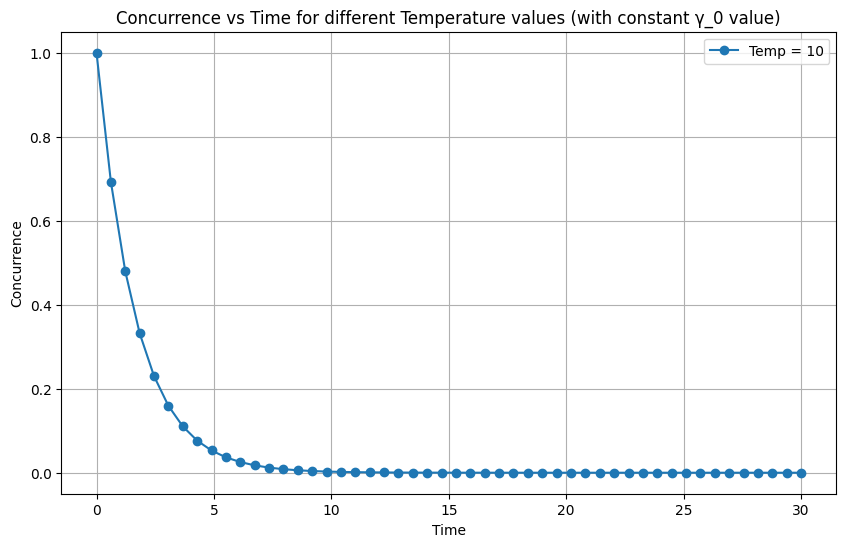

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
b = 1   # Angular momentum (omega), constant value
gamma_0 = 0.3 # Keeping gamma_0 constant
temp_values = [10]  # Temperature values
time_values = np.linspace(0, 30, 50)  # Time values for plotting from 0 to 100 with step 1

# Functions
def calculate_N(temp_value):
    return 1 / (np.exp((b) / (temp_value)) - 1)

def calculate_lambda(gamma_0, t):
    result = 1 - np.exp(-gamma_0 * t)
    return result

def calculate_gamma(gamma_0, N, t):
    return 1 - np.exp(-gamma_0 * (2 * N + 1) * t)

def calculate_P(N):
    return (N + 1) / (2 * N + 1)

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over temperature values
for temp_value in temp_values:
    # Calculate N for the current temperature value
    N = calculate_N(temp_value)
    p = 1

    lambda_values = calculate_lambda(gamma_0, time_values)
    gamma_values = calculate_gamma(gamma_0, N, time_values)
    concurrence_values = []

    # Iterate over time values
    for t, lambda_val, gamma_val in zip(time_values, lambda_values, gamma_values):
        # Define Kraus operators for the first type
        K0 = np.array([[1, 0], [0, np.sqrt(1 - lambda_val)]])
        K1 = np.array([[0, np.sqrt(lambda_val)], [0, 0]])
        K = [K0, K1]  # List of Kraus operators K_i

        # Define Kraus operators for the second type
        E0 = np.array([[1, 0], [0, np.sqrt(1 - lambda_val)]])
        E1 = np.array([[0, np.sqrt(lambda_val)], [0, 0]])
        E = [E0, E1] 

        rho_t = np.zeros_like(rho_0)

        # Iterate over all combinations of K and E
        for K_i in K:
            for E_j in E:
                kron_product = np.kron(K_i, E_j)
                kron_conj_transpose = np.conj(kron_product).T
                rho_t += np.dot(kron_product, np.dot(rho_0, kron_conj_transpose))

        con_t = concurrence(rho_t)
        concurrence_values.append(con_t)

    # Plot concurrence values for current temperature value
    plt.plot(time_values, concurrence_values, label=f'Temp = {temp_value}', marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Concurrence')
plt.title('Concurrence vs Time for different Temperature values (with constant γ_0 value)')
plt.legend()
plt.grid(True)
plt.show()


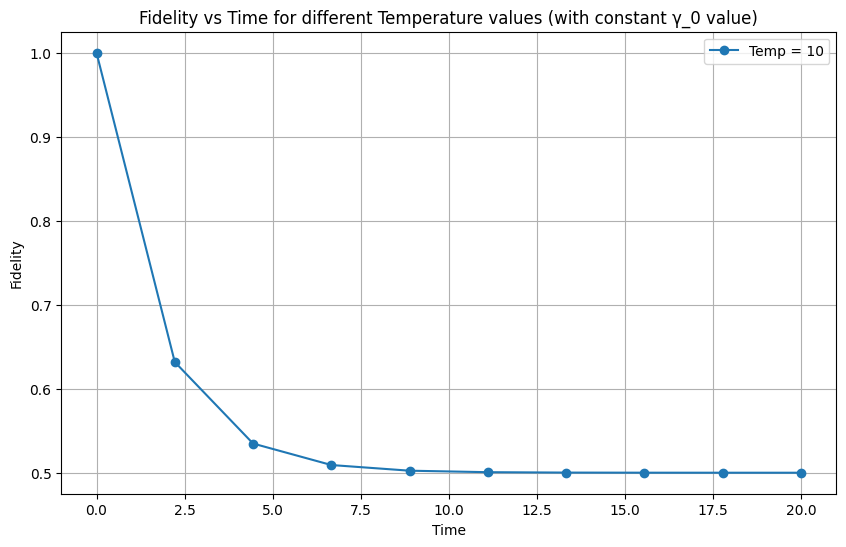

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
b = 1   # Angular momentum (omega), constant value
gamma_0 = 0.3 # Keeping gamma_0 constant
temp_values = [10]  # Temperature values
time_values = np.linspace(0, 20, 10)  # Time values for plotting from 0 to 100 with step 1

# Functions
def calculate_N(temp_value):
    return 1 / (np.exp((b) / (temp_value)) - 1)

def calculate_lambda(gamma_0, t):
    result = 1 - np.exp(-gamma_0 * t)
    return result

def calculate_gamma(gamma_0, N, t):
    return 1 - np.exp(-gamma_0 * (2 * N + 1) * t)

def calculate_P(N):
    return (N + 1) / (2 * N + 1)

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over temperature values
for temp_value in temp_values:
    # Calculate N for the current temperature value
    N = calculate_N(temp_value)
    p = 1

    lambda_values = calculate_lambda(gamma_0, time_values)
    gamma_values = calculate_gamma(gamma_0, N, time_values)
    concurrence_values = []

    # Iterate over time values
    for t, lambda_val, gamma_val in zip(time_values, lambda_values, gamma_values):
        # Define Kraus operators for the first type
        K0 = np.array([[1, 0], [0, np.sqrt(1 - lambda_val)]])
        K1 = np.array([[0, np.sqrt(lambda_val)], [0, 0]])
        K = [K0, K1]  # List of Kraus operators K_i

        # Define Kraus operators for the second type
        E0 = np.array([[1, 0], [0, np.sqrt(1 - lambda_val)]])
        E1 = np.array([[0, np.sqrt(lambda_val)], [0, 0]])
        E = [E0, E1] 

        rho_t = np.zeros_like(rho_0)

        # Iterate over all combinations of K and E
        for K_i in K:
            for E_j in E:
                kron_product = np.kron(K_i, E_j)
                kron_conj_transpose = np.conj(kron_product).T
                rho_t += np.dot(kron_product, np.dot(rho_0, kron_conj_transpose))

        con_t = state_fidelity(rho_0,rho_t)
        concurrence_values.append(con_t)

    # Plot concurrence values for current temperature value
    plt.plot(time_values, concurrence_values, label=f'Temp = {temp_value}', marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity vs Time for different Temperature values (with constant γ_0 value)')
plt.legend()
plt.grid(True)
plt.show()
